In [13]:
import pickle
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

np.random.seed(42)

In [14]:
df = pd.read_csv('ames.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2877 entries, 0 to 2876
Data columns (total 70 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS.SubClass      2877 non-null   object 
 1   MS.Zoning        2877 non-null   object 
 2   Lot.Frontage     2877 non-null   float64
 3   Lot.Area         2877 non-null   float64
 4   Lot.Shape        2877 non-null   object 
 5   Land.Contour     2877 non-null   object 
 6   Lot.Config       2877 non-null   object 
 7   Land.Slope       2877 non-null   object 
 8   Neighborhood     2877 non-null   object 
 9   Bldg.Type        2877 non-null   object 
 10  House.Style      2877 non-null   object 
 11  Overall.Qual     2877 non-null   int64  
 12  Overall.Cond     2877 non-null   int64  
 13  Roof.Style       2877 non-null   object 
 14  Mas.Vnr.Type     1154 non-null   object 
 15  Mas.Vnr.Area     2877 non-null   float64
 16  Exter.Qual       2877 non-null   object 
 17  Exter.Cond    

É possível notar que existem variáveis categóricas, que precisam ser transformadas em numéricas para que o modelo possa ser treinado.

array([[<Axes: title={'center': 'Lot.Frontage'}>,
        <Axes: title={'center': 'Lot.Area'}>,
        <Axes: title={'center': 'Overall.Qual'}>,
        <Axes: title={'center': 'Overall.Cond'}>,
        <Axes: title={'center': 'Mas.Vnr.Area'}>,
        <Axes: title={'center': 'BsmtFin.SF.1'}>],
       [<Axes: title={'center': 'BsmtFin.SF.2'}>,
        <Axes: title={'center': 'Bsmt.Unf.SF'}>,
        <Axes: title={'center': 'Total.Bsmt.SF'}>,
        <Axes: title={'center': 'X1st.Flr.SF'}>,
        <Axes: title={'center': 'X2nd.Flr.SF'}>,
        <Axes: title={'center': 'Low.Qual.Fin.SF'}>],
       [<Axes: title={'center': 'Gr.Liv.Area'}>,
        <Axes: title={'center': 'Bsmt.Full.Bath'}>,
        <Axes: title={'center': 'Bsmt.Half.Bath'}>,
        <Axes: title={'center': 'Full.Bath'}>,
        <Axes: title={'center': 'Half.Bath'}>,
        <Axes: title={'center': 'Bedroom.AbvGr'}>],
       [<Axes: title={'center': 'Kitchen.AbvGr'}>,
        <Axes: title={'center': 'TotRms.AbvGrd'}>,


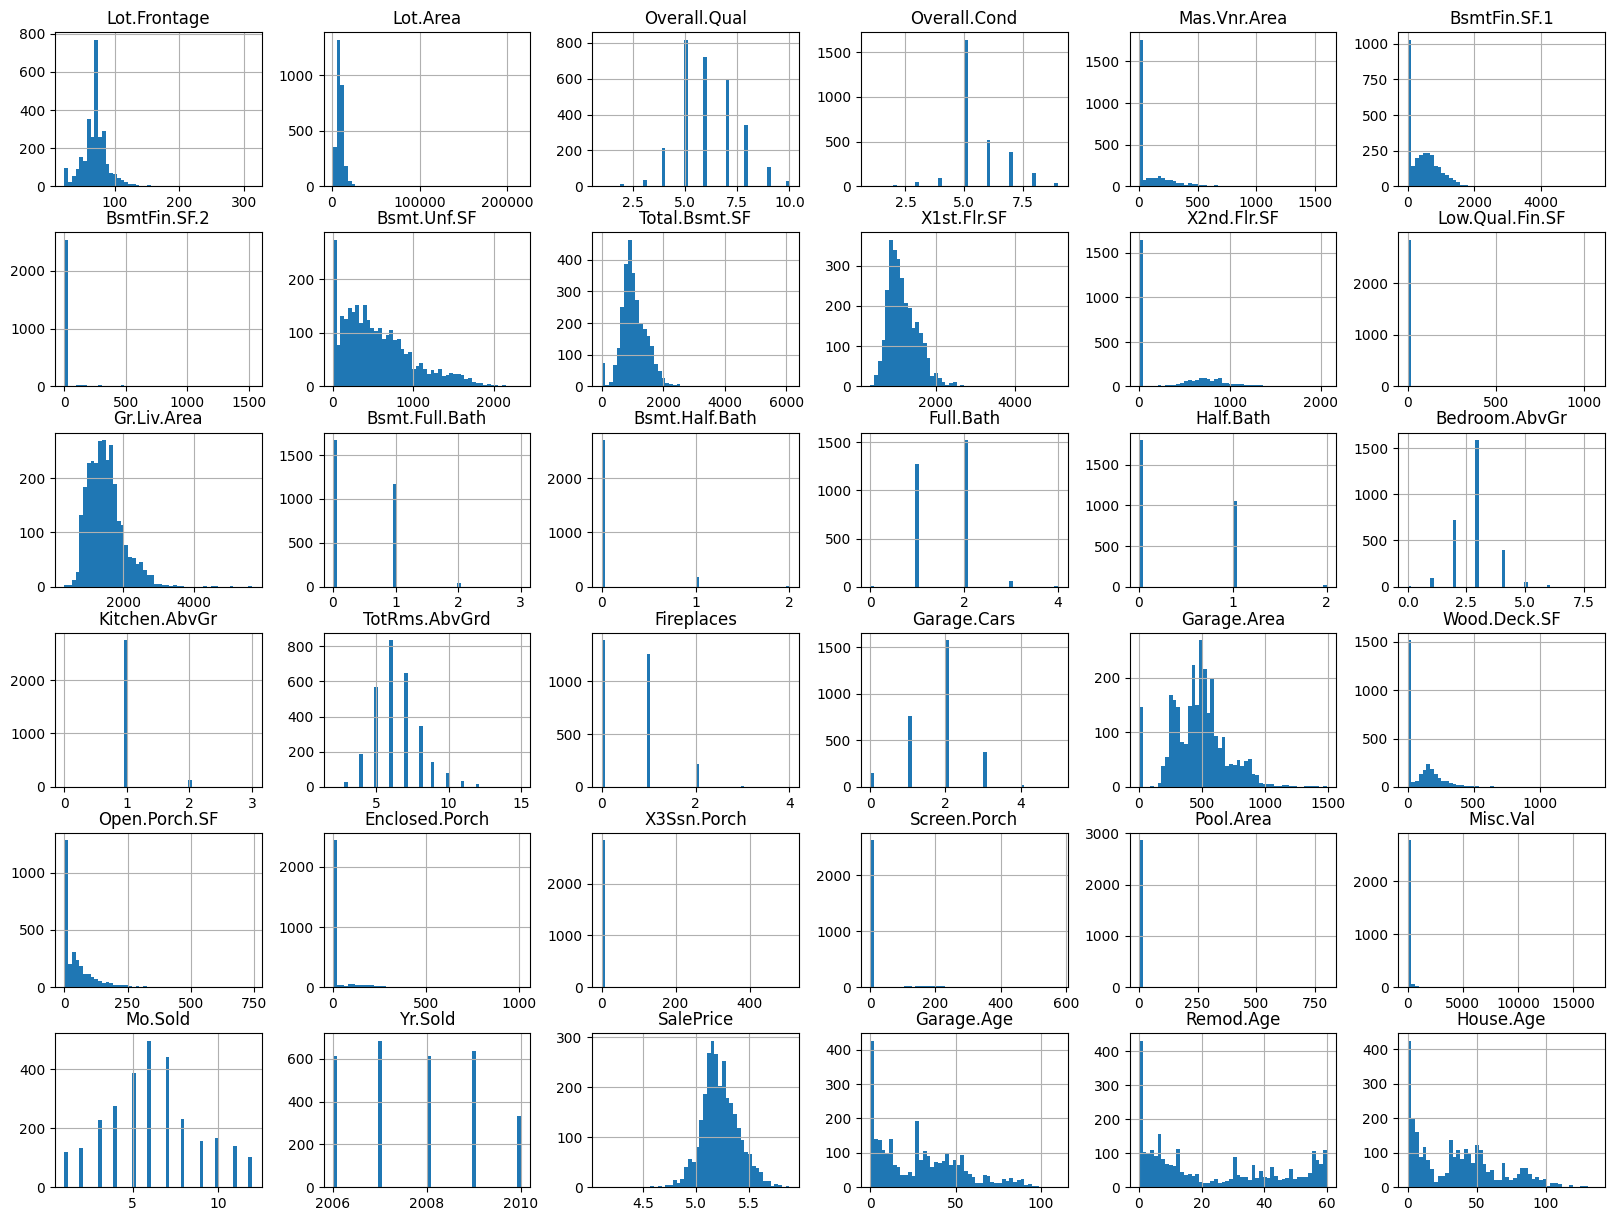

In [15]:
df.hist(bins=50, figsize=(20,15))

In [16]:
df = pd.get_dummies(df).astype('float64')
df.head()

,Lot.Frontage,Lot.Area,Overall.Qual,Overall.Cond,Mas.Vnr.Area,BsmtFin.SF.1,BsmtFin.SF.2,Bsmt.Unf.SF,Total.Bsmt.SF,X1st.Flr.SF,...,Exterior_BrkFace,Exterior_CemntBd,Exterior_HdBoard,Exterior_MetalSd,Exterior_Other,Exterior_Plywood,Exterior_Stucco,Exterior_VinylSd,Exterior_Wd Sdng,Exterior_WdShing
0,141.0,31770.0,6.0,5.0,112.0,639.0,0.0,441.0,1080.0,1656.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,80.0,11622.0,5.0,6.0,0.0,468.0,144.0,270.0,882.0,896.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,81.0,14267.0,6.0,6.0,108.0,923.0,0.0,406.0,1329.0,1329.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,93.0,11160.0,7.0,5.0,0.0,1065.0,0.0,1045.0,2110.0,2110.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,74.0,13830.0,5.0,5.0,0.0,791.0,0.0,137.0,928.0,928.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Analisando as colunas

In [17]:
for col in df.columns:
    print(col)

Lot.Frontage
Lot.Area
Overall.Qual
Overall.Cond
Mas.Vnr.Area
BsmtFin.SF.1
BsmtFin.SF.2
Bsmt.Unf.SF
Total.Bsmt.SF
X1st.Flr.SF
X2nd.Flr.SF
Low.Qual.Fin.SF
Gr.Liv.Area
Bsmt.Full.Bath
Bsmt.Half.Bath
Full.Bath
Half.Bath
Bedroom.AbvGr
Kitchen.AbvGr
TotRms.AbvGrd
Fireplaces
Garage.Cars
Garage.Area
Wood.Deck.SF
Open.Porch.SF
Enclosed.Porch
X3Ssn.Porch
Screen.Porch
Pool.Area
Misc.Val
Mo.Sold
Yr.Sold
SalePrice
HasShed
HasAlley
Garage.Age
Remod.Age
House.Age
MS.SubClass_120
MS.SubClass_160
MS.SubClass_190
MS.SubClass_20
MS.SubClass_30
MS.SubClass_50
MS.SubClass_60
MS.SubClass_70
MS.SubClass_80
MS.SubClass_85
MS.SubClass_90
MS.SubClass_Other
MS.Zoning_FV
MS.Zoning_RH
MS.Zoning_RL
MS.Zoning_RM
Lot.Shape_IR1
Lot.Shape_IR2
Lot.Shape_IR3
Lot.Shape_Reg
Land.Contour_Bnk
Land.Contour_HLS
Land.Contour_Low
Land.Contour_Lvl
Lot.Config_Corner
Lot.Config_CulDSac
Lot.Config_FR2
Lot.Config_FR3
Lot.Config_Inside
Land.Slope_Gtl
Land.Slope_Mod
Land.Slope_Sev
Neighborhood_Blmngtn
Neighborhood_BrDale
Neighborhood_Br

Verificando os resultados dos modelos antes da feature engineering

In [18]:
def visualize_scores(scores):
    print('Scores:', np.sort(scores))
    print('Mean:', scores.mean())
    print('Standard deviation:', scores.std())

In [19]:
# Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X = df.drop('SalePrice', axis=1)
y = df['SalePrice'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scores = cross_val_score(LinearRegression(), X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
visualize_scores(rmse_scores)


Scores: [0.04834068 0.05221888 0.05551748 0.05849542 0.06577588]
Mean: 0.0560696690085533
Standard deviation: 0.005915495993392176


In [20]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor

scores = cross_val_score(RandomForestRegressor(), X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
visualize_scores(rmse_scores)

Scores: [0.05230375 0.05838147 0.05938858 0.06041762 0.06293363]
Mean: 0.05868501075867363
Standard deviation: 0.0035315808571387943


Feature Engineering